In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

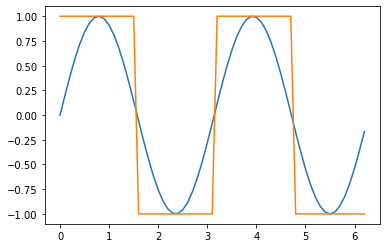

In [2]:
# training sets

# x vector 
step_size = 0.1
x = np.arange(0,2*np.pi,step_size)

# sine wave
ys = np.sin(2*x)
plt.plot(x,ys)

# square wave
ysq = [1 if a >=0 else -1 for a in ys]
plt.plot(x,ysq)

#Testing sets
xtest = np.arange(0.05,2*np.pi,step_size)
sintest = np.sin(2*xtest)
squaretest = [1 if a>=0 else -1 for a in sintest]

In [3]:
def gauss(x,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))

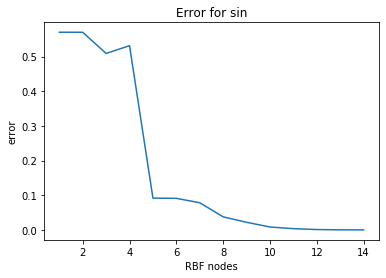

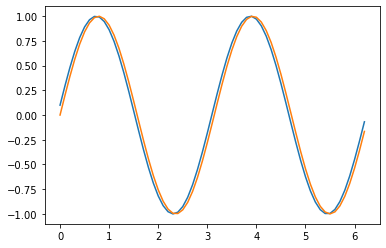

In [4]:
# 3.1.1 Try to vary the number of units to obtain the...

nRbfNodes = 15 # max number of units
n = len(x)
errors =[]
sigma = 1
f_hat = np.zeros((n,nRbfNodes))


# vary from 1 to max number of RBF units
for j in range(1,nRbfNodes):
    phis = np.zeros([n,j])
    phis_test = np.zeros([n,j])

    mus = [i/j*2*np.pi for i in range(j)]

    for i in range(j):
        phis[:,i] = gauss(x,mus[i],sigma)
        phis_test[:,i] = gauss(xtest,mus[i],sigma)

    a = np.dot(phis.T,phis)
    b = np.dot(phis.T,ys)
    W = np.linalg.solve(a,b)

    error = np.mean(abs(np.dot(phis_test,W)-sintest)) 
    errors.append(error)
    f_hat[:,j] = np.dot(phis_test,W)

errors = np.array(errors)

plt.plot(range(1,nRbfNodes),errors)
plt.xlabel('RBF nodes')
plt.ylabel('error')
plt.title('Error for sin')

# first error below 0.1 is 5 units
# first error below 0.01 is 10 units
# first error below 0.001 is 13 units
plt.figure()
plt.plot(x,f_hat[:,13], x,ys)

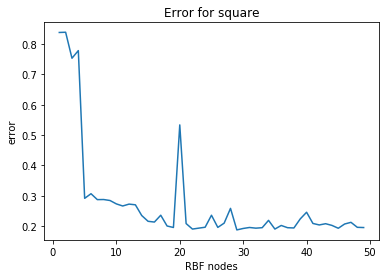

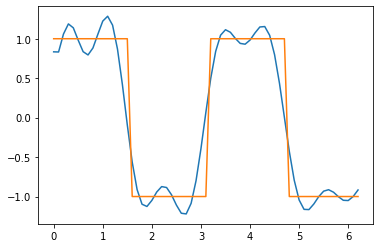

In [5]:
# 3.1.1 SAME BUT FOR SQUARE

nRbfNodes = 50 # max number of units
n = len(x)
errors = []
sigma = 1
f_hat = np.zeros((n,nRbfNodes))

# vary from 1 to max number of RBF units
for j in range(1,nRbfNodes):
    phis = np.zeros([n,j])
    phis_test = np.zeros([n,j])

    mus = [i/j*2*np.pi for i in range(j)]

    for i in range(j):
        phis[:,i] = gauss(x,mus[i],sigma)
        phis_test[:,i] = gauss(xtest,mus[i],sigma)

    a = np.dot(phis.T,phis)
    b = np.dot(phis.T,ysq)
    W = np.linalg.solve(a,b)

    error = np.mean(abs(np.dot(phis_test,W)-squaretest)) 
    errors.append(error)
    f_hat[:,j] = np.dot(phis_test,W)

errors = np.array(errors)

plt.plot(range(1,nRbfNodes),errors)
plt.xlabel('RBF nodes')
plt.ylabel('error')
plt.title('Error for square')

# error is never below 0.1 

plt.figure()
plt.plot(x,f_hat[:,45], x,ysq)



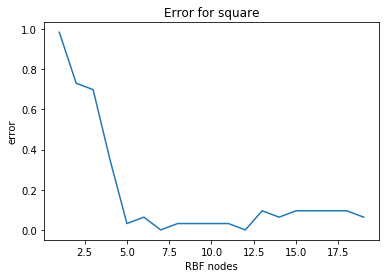

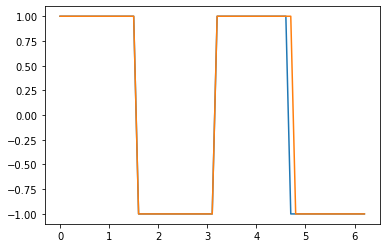

In [6]:
##3.2.2 How can you simply transform the output....

#Ans: Move the values that are inbetween -1 and 1 towards 
#the closest value

nRbfNodes = 20 # max number of units
n = len(x)
errors =[]
sigma = 1
f_hat = np.zeros((n,nRbfNodes))

# vary from 1 to max number of RBF units
for j in range(1,nRbfNodes):
    phis = np.zeros([n,j])
    phis_test = np.zeros([n,j])

    mus = [i/j*2*np.pi for i in range(j)]

    for i in range(j):
        phis[:,i] = gauss(x,mus[i],sigma)
        phis_test[:,i] = gauss(xtest,mus[i],sigma)

    a = np.dot(phis.T,phis)
    b = np.dot(phis.T,ysq)
    W = np.linalg.solve(a,b)
    
    # new for this part. makes error to zero
    C = np.dot(phis_test,W)
    C = [1 if C[i] >=0 else -1 for i in range(len(C))] 
    C = np.array(C)
    
    error = np.mean(abs(C-squaretest)) 
    errors.append(error)
    f_hat[:,j] = C#np.dot(phis_test,W)
    
errors = np.array(errors)

plt.plot(range(1,nRbfNodes),errors)
plt.xlabel('RBF nodes')
plt.ylabel('error')
plt.title('Error for square')



plt.figure()
plt.plot(x,f_hat[:,10], x,ysq)
# error is 0 after 7 units


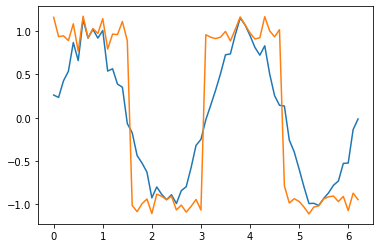

In [7]:
np.random.seed(1)
noise = np.random.normal(0,.1,len(ys))
ys_noise = np.add(ys,noise)
ysq_noise = np.add(ysq,noise)

ys_test_noise = np.add(sintest,noise)
ysq_test_noise = np.add(squaretest,noise)

# 0 is the mean of the normal distribution you are choosing from
# 1 is the standard deviation of the normal distribution
# 100 is the number of elements you get in array noise

plt.plot(x,ys_test_noise)
plt.plot(x,ysq_test_noise)


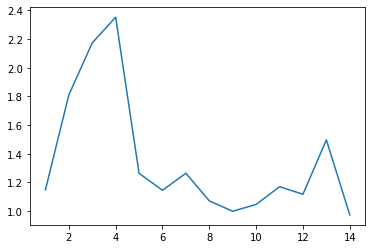

In [8]:
#3.2 On-line learning delta rule

eta = .1
diff = []
n = len(x)
nRbfNodes = 15

W_save = np.zeros((nRbfNodes-1,nRbfNodes-1))
approx_save = np.zeros((n,nRbfNodes))

for j in range(1,nRbfNodes):
    phis = np.zeros(j)
    phis_test = np.zeros((n,j))
    W = np.random.normal(0,1,j)
    
    mu = [i/j*2*np.pi for i in range(j)]
    sigma = 2*np.pi/nRbfNodes
    
    for idx in range(0,len(x)):
        for i in range(j):
            phis[i] = gauss(x[idx],mu[i],sigma)
            phis_test[idx,i] = gauss(xtest[idx],mu[i],sigma)
            
        for i in range(100) or error <= 0.01:
            error = ysq_noise[idx]-np.dot(phis,W)
            delta_w = np.dot(eta*error,phis)  
            W = delta_w+W
    W_save[j-1,:j] = W
    
    approx = np.mean(abs(np.dot(phis_test,W)-ysq_noise))
    approx_save[:,j] = np.dot(phis_test,W)
    diff.append(approx)

diff = np.array(diff)
plt.plot(range(1,nRbfNodes),diff)
#plt.xlabel('RBF nodes')
#plt.ylabel('Error')
#plt.title('Error for sin(2x) with noise')

#plt.plot(x,ys_prox)

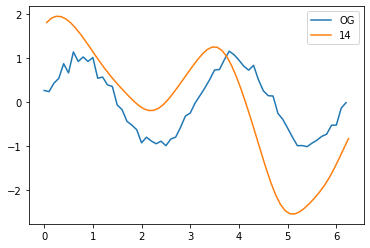

In [63]:
plt.plot(x,ys_test_noise)

plt.plot(xtest,approx_save[:,14])
plt.legend(['OG','14'])

In [64]:
eta = .1
diff = []
nRbfNodes = 2
for j in range(1,nRbfNodes):
    phis = np.zeros(j)
    phis_test = np.zeros(j)
    delta_w = []
    W = np.ones(j)
    mu = [i/j*2*np.pi for i in range(j)]
    for idx in range(0,len(x)):
        for i in range(j):
            phis[i] = gauss(x[idx],mu[i],sigma)
            phis_test[i] = gauss(xtest[idx],mu[i],sigma)
            error = ys_noise[idx]-np.dot(phis[i],W)
        delta_w=(eta*error*phis[i])
        W = delta_w+W 
        
    #f_hat is an approximation of the desired function
    f_hat = np.sum(phis_test*W)
    approx = np.mean(abs(ys_noise-f_hat))
    diff.append(approx)

diff = np.array(diff)
#plt.plot(range(1,nRbfNodes),diff)
#plt.xlabel('RBF nodes')
#plt.ylabel('Error')
#plt.title('Error for sin(2x) with noise')

#plt.plot(x,ys_prox)

In [65]:
def CL_algorithm(x_list, weight_list):
    
    epochs = 100
    
    for i in range(epochs):
        #Calculating similarity
        eta = 0.2
        dist_list = []
        x = np.random.choice(x_list)

        for weight in weight_list:
            dist_list.append(np.linalg.norm(x-weight))


        # Finding winner
        idx = np.argmin(dist_list)
        winner = weight_list[idx]

        # Weight modification
        weight_list[idx] = winner + eta*(x-winner)
        
    return weight_list


Text(0, 0.5, 'y')

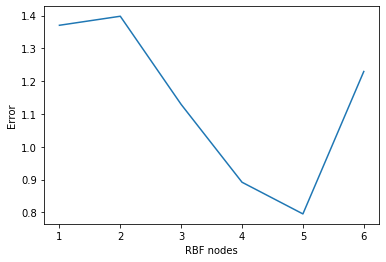

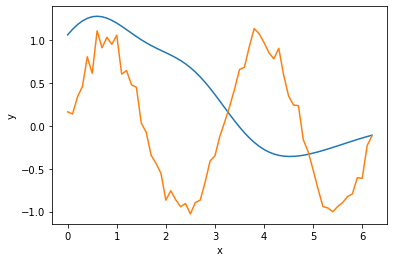

In [67]:
# 3.3 - CL to initialise RBF units

eta = .1
diff = []
n = len(x)
nRbfNodes = 7

# Noise-free functions
Y = np.sin(2*x)
Y = np.add(ys,noise)

W_save = np.zeros((nRbfNodes-1,nRbfNodes-1))
approx_save = np.zeros((n,nRbfNodes))

for j in range(1,nRbfNodes):
    phis = np.zeros(j)
    phis_test = np.zeros((n,j))
    W = np.random.normal(0,1,j)
        
    mu = [i/j*2*np.pi for i in range(j)]
    mu = CL_algorithm(x,mu)
    
    sigma = 2*np.pi/nRbfNodes
    
    for idx in range(0,len(x)):
        for i in range(j):
            phis[i] = gauss(x[idx],mu[i],sigma)
            phis_test[idx,i] = gauss(xtest[idx],mu[i],sigma)

        for i in range(100) or error <= 0.01:
            error = Y[idx]-np.dot(phis,W)
            delta_w = np.dot(eta*error,phis)  
            W = delta_w+W
            
        #error = Y[idx]-np.dot(phis,W)
        #delta_w = np.dot(eta*error,phis)  
        #W = delta_w+W
    W_save[j-1,:j] = W
        
    approx = np.mean(abs(np.dot(phis_test,W)-Y))
    approx_save[:,j] = np.dot(phis_test,W)
    diff.append(approx)



diff = np.array(diff)
plt.plot(range(1,nRbfNodes),diff)
plt.xlabel('RBF nodes')
plt.ylabel('Error')

plt.figure()
plt.plot(x,approx_save[:,5],x,Y)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

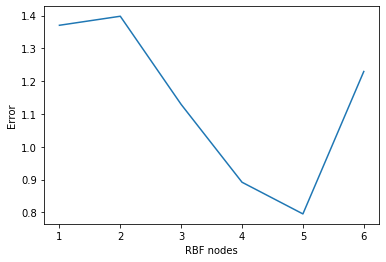

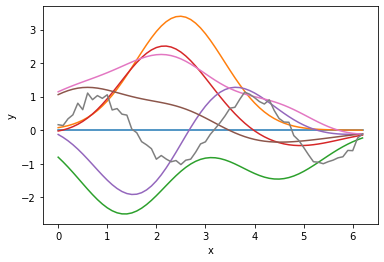

In [69]:
plt.plot(range(1,nRbfNodes),diff)
plt.xlabel('RBF nodes')
plt.ylabel('Error')

plt.figure()
plt.plot(x,approx_save,x,Y)
plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 1.0, 'competitive learning')

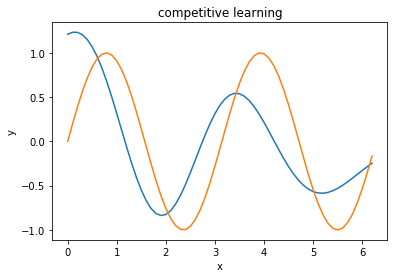

In [481]:
plt.figure()
plt.plot(x,approx_save[:,4],x,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('competitive learning')

In [70]:
train = np.genfromtxt('ballist.dat',
                     dtype=None)
test = np.genfromtxt('balltest.dat',
                     dtype=None)


In [71]:

x1train =[x[0] for x in train]
x2train =[x[1] for x in train]
y1train =[x[2] for x in train]
y2train =[x[3] for x in train]

x1test =[x[0] for x in test]
x2test =[x[1] for x in test]
y1test =[x[2] for x in test]
y2test =[x[3] for x in test]

pat = np.zeros((len(x1train),2))
target = np.zeros((len(x1train),2))

for i in range(len(x1train)):
    pat[i] = [x1train[i],x2train[i]]
    target[i] = [y1train[i],y2train[i]]

pattest = np.zeros((len(x1test),2))
targettest = np.zeros((len(x1test),2))
    
for i in range(len(x1test)):
    pattest[i] = [x1test[i],x2test[i]]
    targettest[i] = [y1test[i],y2test[i]]


In [72]:
def CL_algorithm2(pat, weights):
    
    epochs = 100
    
    for i in range(epochs):
        #Calculating similarity
        eta = 0.2
        dist_list = []
        idx = np.random.choice(len(pat))
        x = pat[idx]

        for weight in weights:
            dist_list.append(np.linalg.norm(x-weight))

        # Finding winner
        idx = np.argmin(dist_list)
        winner = weights[idx]

        # Weight modification
        weights[idx] = winner + eta*(x-winner)

    return weights

def gauss2(pat,mu,sigma):
    return np.exp(-((pat[0]-mu[0])**2+(pat[1]-mu[1])**2)/(2*sigma**2))

In [73]:
# 3.3 - CL to initialise RBF units

eta = .1
diff = []
n = len(pat)
nRbfNodes = 7

approx_save = np.zeros((n,nRbfNodes))


for j in range(6,nRbfNodes):
    phis = np.zeros(j)
    phis_test = np.zeros((n,j))
    W = np.random.normal(0,1,j)
    
    mu = np.zeros((j,2))

    for i in range(j):
        mu[i] = [i/j , i/j]
    
    mu = CL_algorithm2(pat,mu)
    
    sigma = 2*np.pi/nRbfNodes
    
    for idx in range(0,len(pat)):
        for i in range(j):
            phis[i] = gauss2(pat[idx],mu[i],sigma)
            
            phis_test[idx,i] = gauss2(pattest[idx],mu[i],sigma)
                
        error = target[idx]-np.dot(np.transpose(phis),W)
        error = np.mean(error)
        
        delta_w = np.dot(eta*error,phis)
        W = delta_w+W
    

    approx = np.mean(abs(np.dot(phis_test,W)-targettest))
    approx_save[:,j] = np.dot(phis_test,W)
    diff.append(approx)

diff = np.array(diff)
plt.plot(range(1,nRbfNodes),diff)
plt.xlabel('RBF nodes')
plt.ylabel('Error')

plt.figure()
plt.plot(x,approx_save[:,5],x,Y)




ValueError: operands could not be broadcast together with shapes (100,) (100,2) 

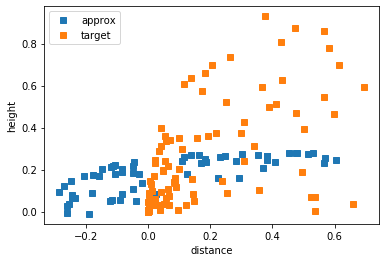

In [74]:
# 3.3 - CL to initialise RBF units

eta = .1
diff = []
n = len(pat)
nRbfNodes = 8
approx_save = np.zeros((n,nRbfNodes,2))
approx = np.zeros((n-1,2))        

for j in range(6,nRbfNodes):
    phisx1 = np.zeros((j))
    phisx2 = np.zeros((j))

    phis_test = np.zeros((n,j,2))
    W = np.random.normal(0,1,(j,2))
    
    delta_w = np.zeros((j,2))
   
    phis = np.zeros((j,2))

    mu = np.zeros((j,2))
    for i in range(j):
        mu[i] = [i/j , i/j]
    
    mu = CL_algorithm2(pat,mu)
    
    sigma = 2*np.pi/nRbfNodes
    for idx in range(0,len(x)):
        for i in range(j):
            phisx1[i] = gauss(pat[idx][0],mu[i][0],sigma)
            phisx2[i] = gauss(pat[idx][1],mu[i][1],sigma)
            phis[i] = [phisx1[i],phisx2[i]]
        
            phis_test[idx,i] = gauss2(pattest[idx],mu[i],sigma)

        errorx1 = target[idx][0]-np.dot(np.transpose(phisx1),W[:,0])
        errorx2 = target[idx][1]-np.dot(np.transpose(phisx2),W[:,1])
        
        error = [errorx1, errorx2]
        error = np.multiply(eta,error)
        delta_w[:,0] = np.dot(error[0],phisx1)
        delta_w[:,1] = np.dot(error[1],phisx2)

        W = delta_w+W
#    print(np.shape(phis_test[:,:,1]))
    for i in range(2):
        phi_val = phis_test[:,:,i]
        approx[i] = np.mean(abs(np.dot(phi_val,W[:,i])-targettest[:,i]))
    diff.append(approx)
    
    
    approx_save[:,j,0] = np.dot(phis_test[:,:,0],W[:,0])
    approx_save[:,j,1] = np.dot(phis_test[:,:,1],W[:,1])



diff = np.array(diff)
#approx_save = approx_save[:,7,:]
plt.plot(approx_save[:,7,0],approx_save[:,7,1],'s')
plt.plot(targettest[:,1],targettest[:,0],'s')

plt.xlabel('distance')
plt.ylabel('height')
plt.legend(['approx','target'])



In [75]:
# PART 2

## imported data
animals = np.genfromtxt('animals.dat', delimiter = ',')
#print(animals)
animals = animals.reshape((32,84)) #props matrix
#print(animals)

animal_attributes = open("animalattributes.txt", "r")
#print(animal_attributes.read())

f = open("animalnames.txt", "r")
animal_names = f.readlines()
#print(animal_names)
txt = open('animalnames.txt', 'r')
animal_names = [line.strip("'\t\n") for line in txt]

## introducing weight matrix, random values between 0 and 1
w = np.random.uniform(0,1,(100,84))



In [76]:
def distprop(animal, w,nh):
    eta = 0.2
    dist_list = []
    
    for weight in w:
        dist_list.append(np.linalg.norm(animal-weight))
        
    idx = np.argmin(dist_list)
    
    for i in range(max(0,idx-nh),min(100,idx+nh)):
        w[i] = w[i] + eta*(animal-w[i])
        
    return w

def animaltesting(animal,w):
    eta = 0.2
    dist_list = []
    
    for weight in w:
        dist_list.append(np.linalg.norm(animal-weight))
        
    idx = np.argmin(dist_list)
    return idx
    
    
    

In [77]:
# 4.1
epochs = 20 


for i in range(epochs):
    nh = int(50*(1-i/epochs))

    for j in range(len(animals)):

        animal= animals[j]
        
        w = distprop(animal,w,nh)

N = animal_names
pos = []    
for i in range(len(animals)):
    animal = animals[i]
    pos.append(animaltesting(animal,w))

z = zip(pos,animal_names)
s = []
for _,x in sorted(z):
    s.append(x)
print(s)

        
        

['antelop', 'horse', 'pig', 'camel', 'giraffe', 'lion', 'cat', 'ape', 'elephant', 'bat', 'kangaroo', 'rabbit', 'rat', 'skunk', 'dog', 'hyena', 'bear', 'walrus', 'crocodile', 'seaturtle', 'frog', 'ostrich', 'duck', 'pelican', 'penguin', 'spider', 'housefly', 'moskito', 'butterfly', 'dragonfly', 'beetle', 'grasshopper']


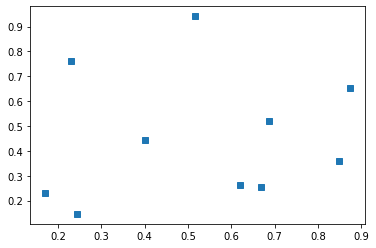

In [78]:
# 4.2

data = open('cities.dat', 'r')
clean = [line.replace(';', '') for line in data]
C = np.genfromtxt(clean, comments='%', delimiter=',')
plt.plot(C[:,0],C[:,1],'s')


In [79]:
def distprop2(city, w,nh):
    eta = 0.2
    dist_list = []
    
    for weight in w:
        dist_list.append(np.linalg.norm(city-weight))
        
    idx = np.argmin(dist_list)
    w[idx,:] = w[idx,:] + eta*(city-w[idx,:])
        
    for k in range(nh):
        minB = (idx+nh+1)%10
        maxB = (idx-nh-1)%10    
        w[minB,:] = w[minB,:]+eta*(city-w[minB,:]) 
        w[maxB,:] = w[maxB,:]+eta*(city-w[maxB,:]) 
    
    return w

def sort2(city,w):
    eta = 0.2
    dist_list = []
    
    for weight in w:
        dist_list.append(np.linalg.norm(city-weight))
        
    idx = np.argmin(dist_list)
    return idx


Text(0.5, 1.0, 'Cyclic tour')

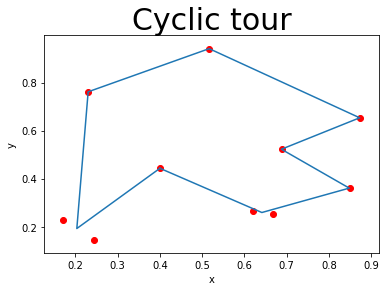

In [81]:
# 4.2

w = np.random.uniform(0,1,(10,2))



epochs = 100

for i in range(epochs):
    nh = int(4*(1-i/epochs))

    for j in range(len(C)):

        city= C[j]
        
        w = distprop2(city,w,nh)

        
        
pos = []    
for i in range(len(C)):
    city = C[i]
    pos.append(sort2(city,w))
        
route = []
for i in range(len(pos)):
    route.append(w[pos[i]])

route.append(w[pos[0]])
route = np.array(route)
plt.scatter(C[:,0],C[:,1], color='red')
plt.plot(route[:,0],route[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cyclic tour', fontsize =30)
    


In [82]:
## imported data
votes = np.genfromtxt('votes.dat', delimiter = ',')
votes = votes.reshape((349,31)) #props matrix

party = np.genfromtxt('mpparty.dat', comments='%', dtype=np.uint8)
# Coding: 0=no party, 1='m', 2='fp', 3='s', 4='v', 5='mp', 6='kd', 7='c'
district = np.genfromtxt('mpdistrict.dat', comments='%', dtype=np.uint8)
sex = np.genfromtxt('mpsex.dat', comments='%', dtype=np.uint8)
# Coding: Male 0, Female 1

In [83]:
def distprop3(vote, w,nh):
    eta = 0.2
    dist_list = []    
    
    dist = np.linalg.norm(vote-w,axis = 1)
    idx = np.argmin(dist)
    
    winnerX, winnerY = np.unravel_index(idx,(10,10))
    ind = []
    output_ind = np.arange(np.prod((10,10))).reshape((10,10))        
    for i in range(10):
        for j in range(10):
            if (abs(winnerX-i)+abs(winnerY-j))<=nh:
                ind.append(output_ind[i,j])
    w[ind,:] =w[ind,:] + eta*(vote-w[ind,:]) 
    
    return w


def sort3(vote,w):
    eta = 0.2
    dist = []
    
    for weight in w:
        dist.append(np.linalg.norm(vote-weight))
        
    idx = np.argmin(dist)
    return idx


In [84]:
# 4.2

w = np.random.uniform(0,1,(100,31))

epochs = 100

for i in range(epochs):
    nh = int(50*(1-i/epochs))

    for j in range(len(votes)):

        vote= votes[j]        
        w = distprop3(vote, w, nh)

nodes = []
pos = []    
for i in range(len(votes)):
    vote = votes[i]
    pos.append(sort3(vote,w))
        
for i in range(len(votes)):
    nodes.append(w[pos[i]])
nodes = np.array(nodes)


print('Done')


Done


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 1.0, 'District 21-29')

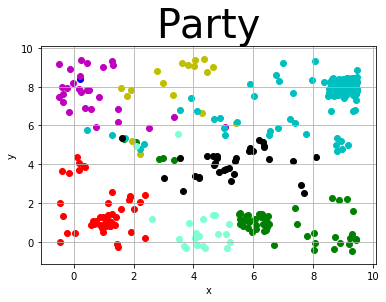

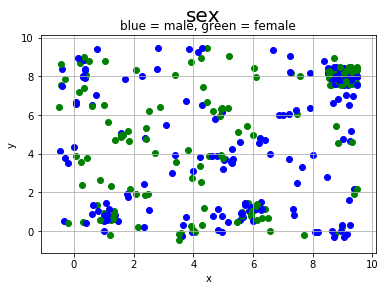

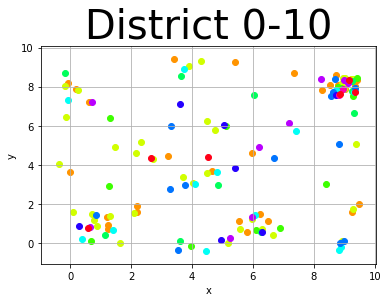

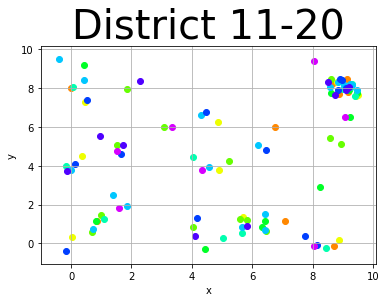

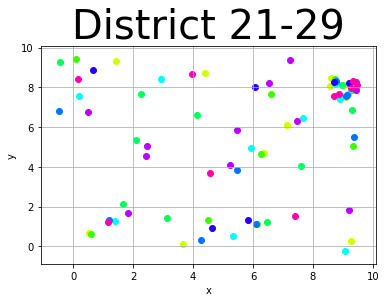

In [85]:
# PART
partymap = np.array(['no party', 'm', 'fp','s','v','mp','kd','c'])
colormap = np.array(['b', 'g', 'r','c','m','y','k','aquamarine'])

L = []
for i in range(len(pos)):
    x,y = np.unravel_index(pos[i],(10,10))
    
    x += np.random.uniform(-0.5,0.5)
    y += np.random.uniform(-0.5,0.5)
    
    part = party[i]
    
    if not part in L:
        L.append(part)
        plt.scatter(x,y,c=colormap[part], label=partymap[part])

    else:
        plt.scatter(x,y,c=colormap[part])
        
plt.grid(True)
plt.title('Party',fontsize=40)
plt.xlabel('x')
plt.ylabel('y')

## SEX

plt.figure()
for i in range(len(pos)):
    x,y = np.unravel_index(pos[i],(10,10))
    
    x += np.random.uniform(-0.5,0.5)
    y += np.random.uniform(-0.5,0.5)
    
    sexy = sex[i]
    
    colormap = np.array(['b', 'g', 'r','c','m','y','k','aquamarine'])
    partymap = np.array(['no party', 'm', 'fp','s','v','mp','kd','c'])
    
    plt.scatter(x,y,c=colormap[sexy])
    plt.grid(True) 
plt.title('blue = male, green = female')
plt.suptitle('sex',fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.figure()
for i in range(len(pos)):
    x,y = np.unravel_index(pos[i],(10,10))
    
    x += np.random.uniform(-0.5,0.5)
    y += np.random.uniform(-0.5,0.5)
    
    dist = district[i]
    if dist >= 11:
        continue
              
    cmap = matplotlib.cm.hsv
    norm = matplotlib.colors.Normalize(vmin=0, vmax=10)
    
    plt.scatter(x,y,c=(cmap(norm(dist))))
    plt.grid(True)  

plt.title('District 0-10',fontsize=40)
plt.xlabel('x')
plt.ylabel('y')
plt.figure()
for i in range(11,len(pos)):
    x,y = np.unravel_index(pos[i],(10,10))
    
    x += np.random.uniform(-0.5,0.5)
    y += np.random.uniform(-0.5,0.5)
    
    dist = district[i]
    if dist >= 20 or dist<=10:
        continue
        
      
    cmap = matplotlib.cm.hsv
    norm = matplotlib.colors.Normalize(vmin=10, vmax=21)
    
    plt.scatter(x,y,c=(cmap(norm(dist))))
    plt.grid(True)  

plt.title('District 11-20',fontsize=40)

plt.xlabel('x')
plt.ylabel('y')
plt.figure()
for i in range(21,len(pos)):
    x,y = np.unravel_index(pos[i],(10,10))
    
    x += np.random.uniform(-0.5,0.5)
    y += np.random.uniform(-0.5,0.5)
    

    
    dist = district[i]   
    if dist <= 21:
        continue
    cmap = matplotlib.cm.hsv
    norm = matplotlib.colors.Normalize(vmin=20, vmax=30)
    plt.scatter(x,y,c=(cmap(norm(dist))))
    plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('District 21-29',fontsize=40)


In [455]:
print(L)

[1, 2, 3, 4, 5, 6, 0, 7]
